# Modelado y Visualización del Forward Atmosférico con Py4CAtS

En este notebook se exploran los conceptos fundamentales para el modelado de la transmisión radiativa atmosférica. Se utilizan las funciones de **Py4CAtS** para leer datos, calcular secciones transversales (cross sections), profundidades ópticas y radiación. La siguiente estructura muestra:

- Importación de librerías.
- Definición de variables globales y parámetros.
- Lectura de los datos atmosféricos.
- Visualizaciones iniciales de radiancia.
- Procesamiento y visualización de líneas espectrales.
- Cálculo de secciones transversales y profundidades ópticas.
- Simulación de radiación (upradiance, downradiance, nadir view).


In [1]:
# Importación de librerías necesarias
import matplotlib.pyplot as plt
import numpy as np

# Importamos funciones de Py4CAtS para el modelado atmosférico
from py4cats import *  
from py4cats.lbl.lines import read_line_file
from py4cats.lbl.lbl2xs import lbl2xs
from py4cats.art.xSection import xsPlot
from py4cats.var.pairTypes import Interval

# (Si es necesario, agregar otras importaciones adicionales de py4cats)


Py4CAtS --- Python for Computational ATmospheric Spectroscopy

A collection of Python scripts for (molecular) line-by-line absorption
(cross sections, optical depths, ...) and atmospheric radiative transfer

https://doi.org/10.3390/atmos10050262    --->   Atmosphere 10(5), 262, 2019
https://atmos.eoc.dlr.de/tools/Py4CAtS/



## Definición de Variables y Parámetros Globales

En esta sección definiremos los parámetros atmosféricos y espectrales que se utilizarán a lo largo del notebook. Estos parámetros incluyen la presión, temperatura, límites espectrales y parámetros para los cálculos (perfil de línea, sampling, número de grids, etc.).


In [2]:
# Parámetros atmosféricos generales (se extraen de los datos MLS)
# Para este ejemplo, asumimos que 'mls' se utilizará más adelante, pero se definen aquí los parámetros generales.
# Nota: más adelante se reemplazarán con lecturas de los archivos.

# Ejemplo de parámetros (para el forward):
pressure_default = 1013.25  # en mb
temperature_default = 296.0   # en K

# Parámetros espectrales para lbl2xs
x_limits = (73.0, 2150.0)  # Rango espectral en cm^-1
line_shape = "Voigt"     # Perfil de línea deseado
sampling = 10.0           # Tasa de muestreo
n_grids = 3              # Número de grids
grid_ratio = 8           # Relación entre grids
n_widths = 25.0          # Límites del grid fino
lagrange = 2             # Interpolación de Lagrange
verbose = True           # Salida detallada
pressure = pressure_default  # Presión en mb
temperature = temperature_default  # Temperatura en K

# Ruta de un archivo de una molécula en particular
# (Ejemplo: H2O)
# Se puede cambiar a la ruta del archivo deseado
file_path = 'data_and_doc/data/lines/CH4.vSEan'
line_data = read_line_file(file_path)

# Ruta de los archivos .vSEan
file_path1 = 'data_and_doc/data/lines/H2O.vSEan'
file_path2 = 'data_and_doc/data/lines/CO.vSEan'
file_path3 = 'data_and_doc/data/lines/CH4.vSEan'
file_path4 = 'data_and_doc/data/lines/H2O.vSEan'
file_path5 = 'data_and_doc/data/lines/OH.vSEan'
file_path6 = 'data_and_doc/data/lines/O3.vSEan'

# Lectura de los archivos .vSEan
line_data1 = read_line_file(file_path1)
line_data2 = read_line_file(file_path2)
line_data3 = read_line_file(file_path3)
line_data4 = read_line_file(file_path4)
line_data5 = read_line_file(file_path5)
line_data6 = read_line_file(file_path6)


 CH4.vSEan               494 lines in   73.011517 ...  93.991050 cm-1   with     2e-29 < S <  2.8e-25   (T=296.0K)

 H2O.vSEan               284 lines in   73.094200 ...  93.903401 cm-1   with   1.3e-30 < S <  1.2e-18   (T=296.0K)

 CO.vSEan                 58 lines in   73.061720 ...  93.975433 cm-1   with   5.8e-32 < S <  5.8e-22   (T=296.0K)

 CH4.vSEan               494 lines in   73.011517 ...  93.991050 cm-1   with     2e-29 < S <  2.8e-25   (T=296.0K)

 H2O.vSEan               284 lines in   73.094200 ...  93.903401 cm-1   with   1.3e-30 < S <  1.2e-18   (T=296.0K)

 OH.vSEan                 72 lines in   73.220000 ...  93.541770 cm-1   with   1.7e-78 < S <  1.3e-18   (T=296.0K)

 O3.vSEan              14272 lines in   73.006000 ...  93.999400 cm-1   with   6.4e-29 < S <  1.4e-21   (T=296.0K)


## Lectura de Datos Atmosféricos y Visualización Inicial

A continuación, se leen los archivos de datos atmosféricos para dos niveles (ej. 20 y 25), y se generan las visualizaciones iniciales de la radiancia. Esto permite apreciar la estructura de los datos atmosféricos antes de proceder al procesamiento de líneas espectrales.


 Atmos1d: got p, T, air   and 8 molecules on 20 levels
 Atmos1d: got p, T, air   and 8 molecules on 25 levels
 WARNING --- atmTruncate:  zToA very small, assuming kilometer units


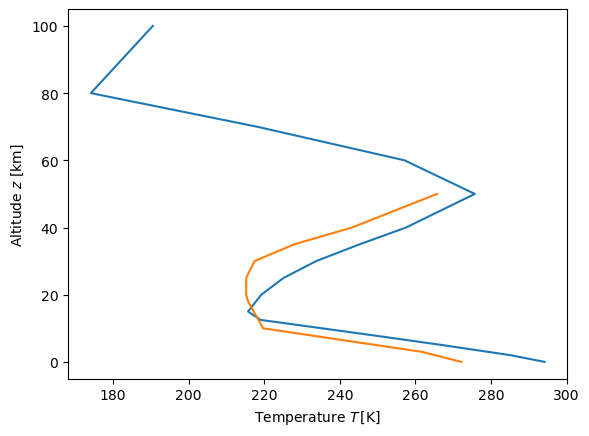

In [3]:
# Lectura de los datos atmosféricos usando atmRead
mls = atmRead('data_and_doc/data/atmos/20/mls.xy')
mlw = atmRead('data_and_doc/data/atmos/25/mlw.xy', zToA=50)

# Graficamos cada dataset individualmente
atmPlot(mls)
atmPlot(mlw)


## Visualización Comparativa y Parámetros Derivados

En esta celda se genera un plot comparativo para resaltar las diferencias o similitudes en la radiancia, 
así como la visualización de la variable de mezcla (vmr) para el dataset 'mls'.  
Estos gráficos sirven para tener una primera idea del forward atmosférico.


array([[1.876e-02, 3.300e-04, 3.017e-08, 3.200e-07, 1.500e-07, 1.700e-06,
        7.810e-01, 2.090e-01],
       [1.378e-02, 3.300e-04, 3.337e-08, 3.200e-07, 1.450e-07, 1.700e-06,
        7.810e-01, 2.090e-01],
       [9.680e-03, 3.300e-04, 3.694e-08, 3.200e-07, 1.399e-07, 1.700e-06,
        7.810e-01, 2.090e-01],
       [5.984e-03, 3.300e-04, 4.222e-08, 3.200e-07, 1.349e-07, 1.700e-06,
        7.810e-01, 2.090e-01],
       [3.813e-03, 3.300e-04, 4.821e-08, 3.200e-07, 1.312e-07, 1.697e-06,
        7.810e-01, 2.090e-01],
       [2.225e-03, 3.300e-04, 5.512e-08, 3.200e-07, 1.303e-07, 1.687e-06,
        7.810e-01, 2.090e-01],
       [8.332e-04, 3.300e-04, 8.445e-08, 3.197e-07, 1.216e-07, 1.639e-06,
        7.810e-01, 2.090e-01],
       [2.472e-04, 3.300e-04, 1.304e-07, 3.096e-07, 9.962e-08, 1.579e-06,
        7.810e-01, 2.090e-01],
       [1.872e-05, 3.300e-04, 2.615e-07, 2.898e-07, 7.094e-08, 1.494e-06,
        7.810e-01, 2.090e-01],
       [3.400e-06, 3.300e-04, 5.000e-07, 2.724e-07, 3.9

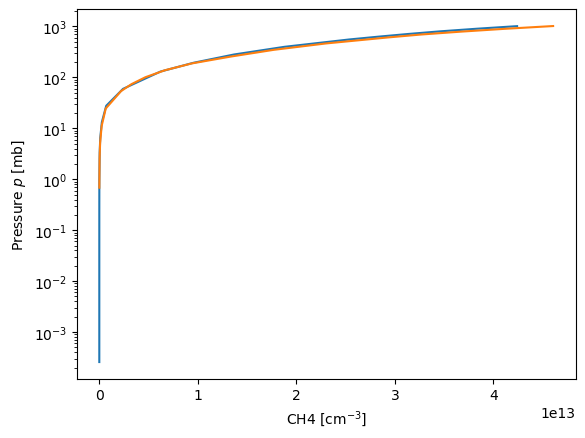

In [4]:
# Plot comparativo de radiancia para ambos datasets:
atmPlot([mls, mlw], 'CH4', 'mb') 

# Cálculo y visualización de la mezcla de volumen (vmr) a partir de mls
vmr(mls)


## Visualización de Líneas Espectrales: Ejemplo de O2

En esta sección se lee un archivo .vSEan (archivo de líneas espectrales) correspondiente a O2, se extraen los datos relevantes (número de onda y fuerza de línea) y se realiza un plot tipo stem (con escala logarítmica) para visualizar las líneas espectrales.


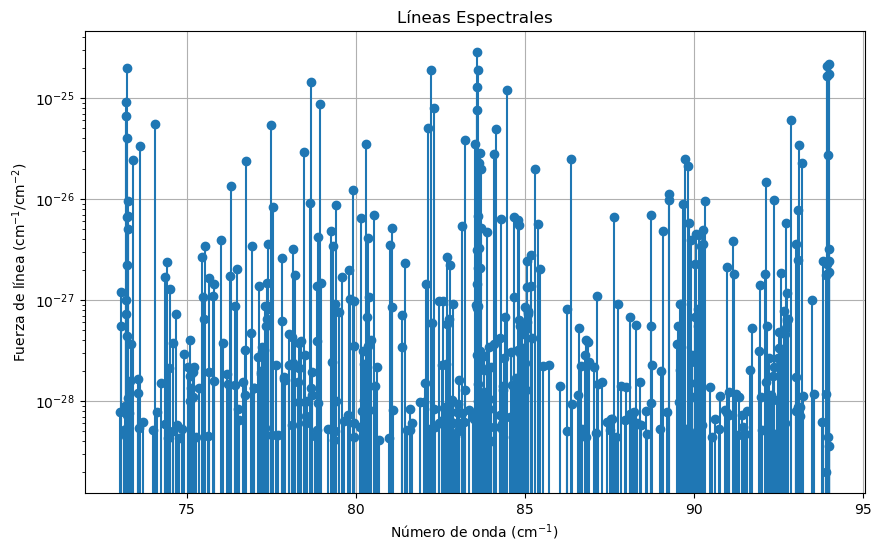

In [5]:
# Extraer los datos de número de onda y fuerza de línea
wavenumber = line_data['v']
line_strength = line_data['S']

# Graficar los datos
plt.figure(figsize=(10, 6))
plt.stem(wavenumber, line_strength, basefmt=" ")  # stem plot
plt.xlabel('Número de onda (cm$^{-1}$)')
plt.ylabel('Fuerza de línea (cm$^{-1}$/cm$^{-2}$)')
plt.title('Líneas Espectrales')
plt.yscale('log')
plt.grid(True)
plt.show()


## ***Visualización de la sección cruzada de una molécula en particular***

In [ ]:
xs = lbl2xs(
    line_data,
    pressure=pressure,
    temperature=temperature,
    xLimits=x_limits,
    lineShape=line_shape,
    sampling=sampling,
    nGrids=n_grids,
    gridRatio=grid_ratio,
    nWidths=n_widths,
    lagrange=lagrange,
    verbose=verbose,
)

# Print the cross-section data


print(xs)
xsPlot(xs)

print(line_data)

 lbl2xs:  CH4       16.04amu  pressure [g/cm/s**2] 1.01325e+06 ---> 1013.25
                              temperature      [K]      296.0  ---> 296.0

 voigt line parameters at       1.01mb and    296.00K
 position           73.011517 <=  v <=    93.991050
 strength               2e-29 <=  S <=     2.84e-25
 Lorentz width        2.8e-05 <=  L <=      6.6e-05
 Gauss width         0.000112 <=  D <=     0.000145
 cross section  CH4        494 lines   1.01325mb  296.0K  12.5 lbl_2grids_chi Interval [73,2150] 10.0 8 25.0 True 12.5

 lbl_2grids_chi:    vGrid 131799817 1.5758747341498565e-05   w 16474978 0.00012606997873198852
 v:  131799816    73.000000   73.000016   73.000032   73.000047   73.000063  ...  2149.999937 2149.999953 2149.999968 2149.999984 2150.000000
 w:   16474977    73.000000   73.000126   73.000252   73.000378   73.000504  ...  2149.999496 2149.999622 2149.999748 2149.999874 2150.000000
  131799817    10.50sec     0.16ns:         0 < xs < 7.10414e-22
# CH4  (T=296.0K, p=1.0

## ***Visualización de la sección cruzada de las moléculas combinadas***

In [ ]:

# Ejemplo de uso de las moleculas en data combinada

'''combined_line_data = {
    'H2O': line_data1,
    'CO': line_data2,
    'CH4': line_data3,
    'H2O': line_data4,
    'OH': line_data5,
    'O3': line_data6
}'''

# Quitar o dejar las moleculas deseadas para plotear
# Ejemplo de uso de las moléculas en data combinada

# Definimos un diccionario con los datos de las líneas espectrales
combined_line_data = {
    'H2O': line_data1,
    'CO': line_data2,
    'CH4': line_data3,
    'H2O': line_data4,
    'OH': line_data5,
    'O3': line_data6
}

# Definimos un rango de presión y temperatura para el cálculo de la sección transversal (Se pueden cambiar en la casilla de arriba
# donde se definen los parámetros atmosféricos generales)

xs = lbl2xs(
    combined_line_data,
    pressure=pressure,
    temperature=temperature,
    xLimits=x_limits,
    lineShape=line_shape,
    sampling=sampling,
    nGrids=n_grids,
    gridRatio=grid_ratio,
    nWidths=n_widths,
    lagrange=lagrange,
    verbose=verbose,
)

# Graficamos la sección transversal
print(xs)
xsPlot(xs)
atlas(combined_line_data)
print(line_data)

 lbl2xs:  H2O       18.02amu  pressure [g/cm/s**2] 1.01325e+06 ---> 1013.25
                              temperature      [K]      296.0  ---> 296.0

 voigt line parameters at       1.01mb and    296.00K
 position           73.094200 <=  v <=    93.903401
 strength             1.3e-30 <=  S <=     1.17e-18
 Lorentz width        7.7e-06 <=  L <=       0.0001
 Gauss width         0.000106 <=  D <=     0.000136
 cross section  H2O        284 lines   1.01325mb  296.0K  25.0 lbl_2grids_chi Interval [73,2150] 10.0 8 25.0 True 25.0

 lbl_2grids_chi:    vGrid 127980609 1.62290211967113e-05   w 15997577 0.0001298321695736904
 v:  127980608    73.000000   73.000016   73.000032   73.000049   73.000065  ...  2149.999935 2149.999951 2149.999968 2149.999984 2150.000000
 w:   15997576    73.000000   73.000130   73.000260   73.000389   73.000519  ...  2149.999481 2149.999611 2149.999740 2149.999870 2150.000000
  127980609    11.68sec     0.32ns:         0 < xs < 2.39069e-15
 lbl2xs:  CO        28.01a

##  

In [ ]:
xs = lbl2xs(
    line_data,
    pressure=pressure,
    temperature=temperature,
    xLimits=x_limits,
    lineShape=line_shape,
    sampling=sampling,
    nGrids=n_grids,
    gridRatio=grid_ratio,
    nWidths=n_widths,
    lagrange=lagrange,
    verbose=verbose
)


# Atlas de las moleculas combinadas
print(xs)
xsPlot(xs)
atlas(line_data)  

 lbl2xs:  CH4       16.04amu  pressure [g/cm/s**2] 1.01325e+06 ---> 1013.25
                              temperature      [K]      296.0  ---> 296.0

 voigt line parameters at       1.01mb and    296.00K
 position           73.011517 <=  v <=    93.991050
 strength               2e-29 <=  S <=     2.84e-25
 Lorentz width        2.8e-05 <=  L <=      6.6e-05
 Gauss width         0.000112 <=  D <=     0.000145
 cross section  CH4        494 lines   1.01325mb  296.0K  12.5 lbl_2grids_chi Interval [73,2150] 10.0 8 25.0 True 12.5

 lbl_2grids_chi:    vGrid 131799817 1.5758747341498565e-05   w 16474978 0.00012606997873198852
 v:  131799816    73.000000   73.000016   73.000032   73.000047   73.000063  ...  2149.999937 2149.999953 2149.999968 2149.999984 2150.000000
 w:   16474977    73.000000   73.000126   73.000252   73.000378   73.000504  ...  2149.999496 2149.999622 2149.999748 2149.999874 2150.000000
  131799817    13.40sec     0.21ns:         0 < xs < 7.10414e-22
# CH4  (T=296.0K, p=1.0

In [ ]:
absCoList = xs2ac (mls, xs)
acPlot(absCoList)

## ***Camino Óptico***

 lbl2xs:  CH4       16.04amu  pressure [g/cm/s**2] 1.01325e+06 ---> 1013.25
                              temperature      [K]      296.0  ---> 296.0

 voigt line parameters at       1.01mb and    296.00K
 position           73.011517 <=  v <=    93.991050
 strength               2e-29 <=  S <=     2.84e-25
 Lorentz width        2.8e-05 <=  L <=      6.6e-05
 Gauss width         0.000112 <=  D <=     0.000145
 cross section  CH4        494 lines   1.01325mb  296.0K  12.5 lbl_2grids_chi Interval [73,97] 10.0 8 25.0 True 12.5

 lbl_2grids_chi:    vGrid 1522961 1.5758785522929032e-05   w 190371 0.00012607028418343226
 v:    1522960    73.000000   73.000016   73.000032   73.000047   73.000063  ...    96.999937   96.999953   96.999968   96.999984   97.000000
 w:     190370    73.000000   73.000126   73.000252   73.000378   73.000504  ...    96.999496   96.999622   96.999748   96.999874   97.000000
    1522961     6.52sec     8.66ns:  1.80485e-30 < xs < 7.11336e-22
 lbl2od:   20 levels atmos

/home/julianleon/.conda/envs/py4cats_fix/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/julianleon/.conda/envs/py4cats_fix/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


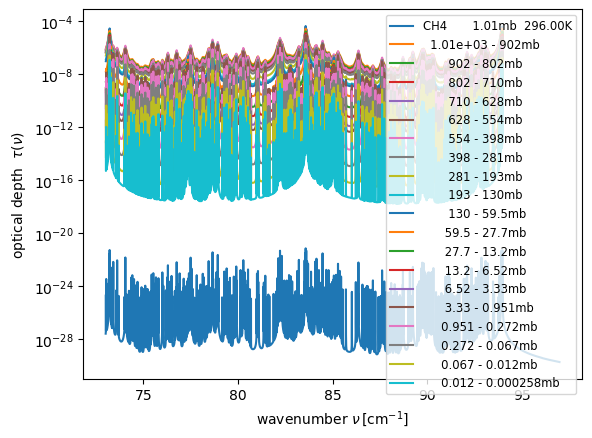

In [ ]:

# Calculate cross sections using atmospheric conditions
xssDict = lbl2xs(
    line_data,
    pressure=pressure,
    temperature=temperature,
    xLimits=x_limits,
    lineShape=line_shape,
    sampling=sampling,
    nGrids=n_grids,
    gridRatio=grid_ratio,
    nWidths=n_widths,
    lagrange=lagrange,
    verbose=verbose
)

xsPlot(xssDict)
dodl = lbl2od(mls, line_data)
odPlot(dodl)

In [ ]:
absCoList = xs2ac (mls, xssDict)

## ***Radiance***

In [ ]:
radUp = dod2ri(dodl)  # downwelling radiation seen by an uplooking observer
radDown = dod2ri(dodl, 180.)  # upwelling radiation seen by a nadir viewer
radNadir = dod2ri(dodl, 180., mls['T'][0])  # forgot surface emission, assume T_surface=T_BoA=mls['T'][0]=mls[0]['T']
#Adding Planck BB background for  294.2K   ===>   3.21273 <= B <= 3.82278

riPlot([radUp,radDown,radNadir])